# House Price Prediction Model ( Linear regression model ) - Build from Scratch



<a name="toc_40291_2"></a>
## Problem Statement

Let's use the same two data points as before - a house with 1000 square feet sold for \\$300,000 and a house with 2000 square feet sold for \\$500,000.

| Size (1000 sqft)     | Price (1000s of dollars) |
| ----------------| ------------------------ |
| 1               | 300                      |
| 2               | 500                      |



<a name="toc_40291_2.1"></a>
## Gradient descent summary
So far in this course, you have developed a linear model that predicts $f_{w,b}(x^{(i)})$:
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$
In linear regression, you utilize input training data to fit the parameters $w$,$b$ by minimizing a measure of the error between our predictions $f_{w,b}(x^{(i)})$ and the actual data $y^{(i)}$. The measure is called the $cost$, $J(w,b)$. In training you measure the cost over all of our training samples $x^{(i)},y^{(i)}$
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$ 



In lecture, *gradient descent* was described as:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

Here *simultaniously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters.

<a name="toc_40291_2.2"></a>
## Implement Gradient Descent
You will implement gradient descent algorithm for one feature. You will need three functions. 
- `compute_gradient` implementing equation (4) and (5) above
- `compute_cost` implementing equation (2) above (code from previous lab)
- `gradient_descent`, utilizing compute_gradient and compute_cost

Conventions:
- The naming of python variables containing partial derivatives follows this pattern,$\frac{\partial J(w,b)}{\partial b}$  will be `dj_db`.
- w.r.t is With Respect To, as in partial derivative of $J(wb)$ With Respect To $b$.


In [70]:
import numpy as np
import math

In [71]:
x_train = np.array([1,2])
y_train = np.array([300,500])

## compute cost/gradient/gradient descent

In [72]:
def compute_cost(x,y,w,b):
    
    # initalize the cost     
    cost = 0 
    
    # of training records
    m = x.shape[0]
    
    #cost with given parameters
    for i in range(m):
        y_hat = w * x[i] + b
        y_actual = y[i]
        cost = cost + (y_hat - y_actual)**2
    
    total_cost = (1/(2*m)) * cost
    
    return total_cost

In [73]:
def compute_gradient(x,y,w,b): 
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    
    
    for i in range(m):
        y_hat = x[i] * w + b
        y_actual = y[i]
        x_i = x[i]
        
        dj_dw +=  (y_hat - y_actual) * x_i
        dj_db +=  (y_hat - y_actual)
        
    
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    return dj_dw, dj_db




In [77]:
def gradient_descent(x,y, w_in, b_in, alpha, num_iters,cost_function, gradient_function):
    
    cost_history = list()
    param_history = list()
    p_iteration_at = math.ceil(num_iters/10)
    b = b_in
    w = w_in 
    
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w , b)
        
        # update parameters using equation
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        if i < 100000:
            cost_history.append(cost_function(x, y, w , b))
            param_history.append([w,b])
        
        if i % p_iteration_at == 0:
            print(f"Iteration {i:4}: Cost {cost_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w,b , cost_history, param_history
                                

## initialize parameters and calculate the cost , params at every iteration

In [166]:
# initialize parameters
w_init = 0
b_init = 0
print(w_init,b_init)
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, cost_hist, param_hist = gradient_descent(x_train ,y_train, 0, 0, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)

print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

0 0
Iteration    0: Cost 7.93e+04  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  6.500e+00, b: 4.00000e+00
Iteration 1000: Cost 3.41e+00  dj_dw: -3.712e-01, dj_db:  6.007e-01   w:  1.949e+02, b: 1.08228e+02
Iteration 2000: Cost 7.93e-01  dj_dw: -1.789e-01, dj_db:  2.895e-01   w:  1.975e+02, b: 1.03966e+02
Iteration 3000: Cost 1.84e-01  dj_dw: -8.625e-02, dj_db:  1.396e-01   w:  1.988e+02, b: 1.01912e+02
Iteration 4000: Cost 4.28e-02  dj_dw: -4.158e-02, dj_db:  6.727e-02   w:  1.994e+02, b: 1.00922e+02
Iteration 5000: Cost 9.95e-03  dj_dw: -2.004e-02, dj_db:  3.243e-02   w:  1.997e+02, b: 1.00444e+02
Iteration 6000: Cost 2.31e-03  dj_dw: -9.660e-03, dj_db:  1.563e-02   w:  1.999e+02, b: 1.00214e+02
Iteration 7000: Cost 5.37e-04  dj_dw: -4.657e-03, dj_db:  7.535e-03   w:  1.999e+02, b: 1.00103e+02
Iteration 8000: Cost 1.25e-04  dj_dw: -2.245e-03, dj_db:  3.632e-03   w:  2.000e+02, b: 1.00050e+02
Iteration 9000: Cost 2.90e-05  dj_dw: -1.082e-03, dj_db:  1.751e-03   w:  2.000e+02, b: 1.00024e

## Cost vs Iteration visualization ( checking cost )

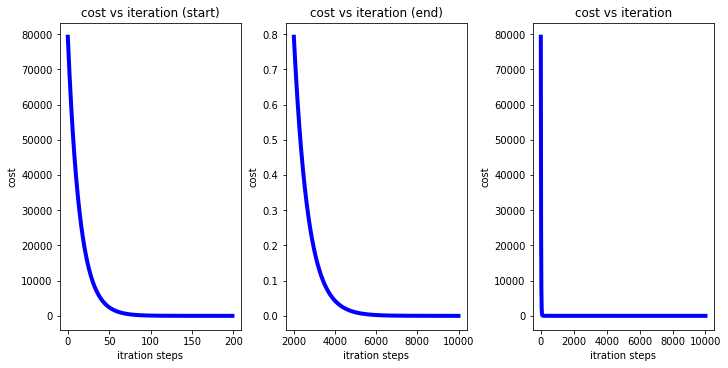

In [167]:
import matplotlib.pyplot as plt
np_cost_hist = np.array(cost_hist)
np_iter_array = np.arange(np_cost_hist.shape[0])
fix, axes = plt.subplots(1,3,figsize=(10,5),constrained_layout=True)


# Plot 1 settings
axes[0].plot(np_iter_array[:200],np_cost_hist[:200],linewidth=4, color="blue")
axes[0].set_title("cost vs iteration (start)")

# Plot 2 settings
axes[1].plot(np_iter_array[-8000:],np_cost_hist[-8000:],linewidth=4, color="blue")
axes[1].set_title("cost vs iteration (end)")

# Plot 3 settings
axes[2].plot(np_iter_array,np_cost_hist,linewidth=4, color="blue")
axes[2].set_title("cost vs iteration")

for i in range(3):
    axes[i].set_xlabel("itration steps")
    axes[i].set_ylabel("cost")

plt.show()

- cost is reduced significantly after 60 iterations, we don't need 10k iteration to achive 100% accuracy

## Contour Plot to check How the cost varies with changing w,b and at at w,b value the Cost is minimize, those w,b are the learned parameters

In [168]:
cost_array = np.array(cost_hist)

In [187]:
param_array = np.array(param_hist)
w_array = param_array[:,0]
b_array = param_array[:,1]

In [192]:
colors = [
    "#FF5733",  # vivid coral red
    "#33FF57",  # bright neon green
    "#3357FF",  # strong royal blue
    "#FF33A8",  # neon pink
    "#F1C40F",  # bright yellow
    "#8E44AD",  # deep purple
    "#1ABC9C",  # bright teal
    "#E67E22",  # strong orange
    "#E74C3C",  # vibrant red
    "#2ECC71"   # bold green
]

In [198]:
import numpy as np
w_vals = np.linspace(np.min(w_array)-200, np.max(w_array)+200, 200)
b_vals = np.linspace(np.min(b_array)-200, np.max(b_array)+200, 200)
W,B = np.meshgrid(w_vals,b_vals)
W,B
J = np.zeros_like(W)
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        J[i, j] = compute_cost( x_train, y_train,W[i, j], B[i, j])

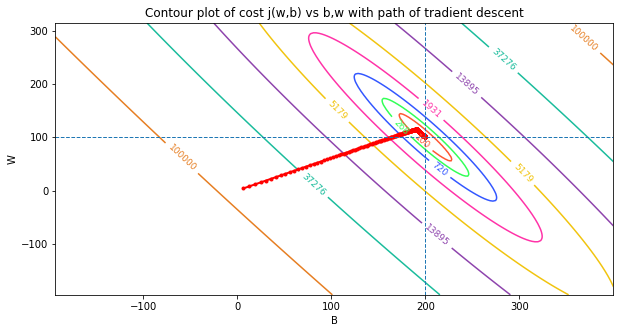

In [208]:
plt.figure(figsize=(10, 5))

# Choose contour levels (try log spacing for nicer rings)
# it only plot contour plot at these line spaces received on levels. 
levels = np.logspace(2, 5, 8)  # adjust if needed

cs = plt.contour(W, B, J, levels=levels,colors=colors)
plt.clabel(cs, inline=True, fontsize=9)

# # Gradient descent path (red)
plt.plot(w_array, b_array, 'r-o', markersize=3, linewidth=2)


# # Optional: dashed guide lines like in your screenshot poiting at minimum lose. 
plt.axvline(w_final, linestyle='--', linewidth=1)
plt.axhline(b_final, linestyle='--', linewidth=1)
plt.title("Contour plot of cost j(w,b) vs b,w with path of tradient descent")
plt.xlabel("B")
plt.ylabel("W")

plt.show()

### Predictions
Now that we have discovered the optimal values for the parameters $w$ and $b$, you can now use the model to predict housing values based on our learned parameters. As expected, the predicted values are nearly the same as the training values for the same housing. Further, the value not in the prediction is in line with the expected value.

In [211]:
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 300.0 Thousand dollars
1200 sqft house prediction 340.0 Thousand dollars
2000 sqft house prediction 500.0 Thousand dollars
